Este colab fue desarrollado por Arnold Charry Armero.

# DBSCAN Clustering

El algoritmo DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un método de aprendizaje no supervisado utilizado para identificar agrupaciones de datos basadas en densidad. A diferencia de algoritmos como K-Means, DBSCAN no requiere especificar el número de clústeres ni asume que estos tengan una forma esférica.

Su funcionamiento se basa en dos parámetros: $ε$ (epsilon), que define el radio de vecindad alrededor de un punto, y MinPts, que indica el número mínimo de puntos necesarios para considerar una región como densa.

Un punto núcleo (core point) es aquel que tiene al menos MinPts dentro de su vecindad $ε$; a partir de él, se pueden expandir los clústeres conectando otros puntos núcleo cercanos. Los puntos borde (border points) son aquellos que se encuentran dentro del vecindario de un punto núcleo, pero no cumplen por sí mismos con el requisito de densidad. Finalmente, los puntos de ruido (noise points o outliers) son los que no pertenecen a ningún clúster, ya que no están lo suficientemente cerca de puntos núcleo ni de regiones densas.

De esta manera, DBSCAN permite identificar clústeres de forma arbitraria y separar automáticamente el ruido en los datos, siendo especialmente útil cuando las agrupaciones no son esféricas o cuando hay valores atípicos. Se define el  $ε$ como el radio del vecindario alrededor de un punto $x$ matemáticamente como $N(x)$ de la siguiente manera:

$$ N(x) = \{\, p \in X : \text{dist}(p, x) \leq \varepsilon \,\} $$

Ahora se continúa con la implementación en código,


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
two_blobs = pd.read_csv('/content/drive/MyDrive/Machine Learning/Bases de Datos/cluster_two_blobs.csv')

Se mira la primera visualización,

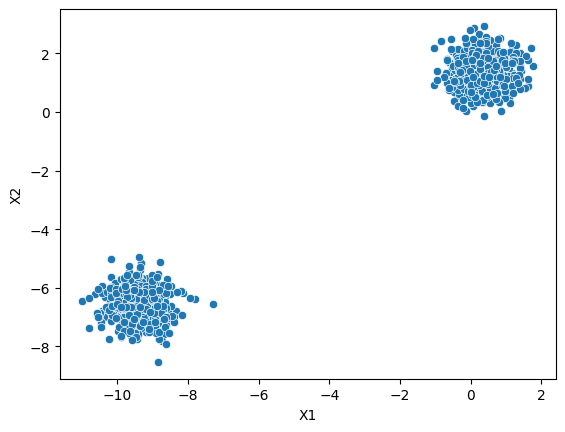

In [ ]:
sns.scatterplot(data = two_blobs, x = 'X1', y = 'X2')
plt.show()

In [ ]:
def display_categories(model, data):
  labels = model.fit_predict(data)
  sns.scatterplot(data = data, x = 'X1', y = 'X2', hue = labels, palette = "viridis")
  plt.show()

Se analizan los clústers con outliers,

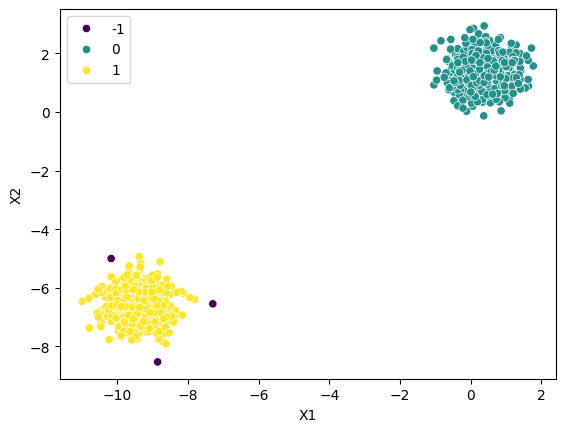

In [ ]:
dbscan = DBSCAN()
display_categories(dbscan, two_blobs)

In [ ]:
int(np.sum(dbscan.labels_ == -1))

3

In [ ]:
round(float(100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)), 2)

0.3

Ahora se analizan los clústers con más outliers,

In [ ]:
two_blobs_with_outliers = pd.read_csv('/content/drive/MyDrive/Machine Learning/Bases de Datos/cluster_two_blobs_outliers.csv')

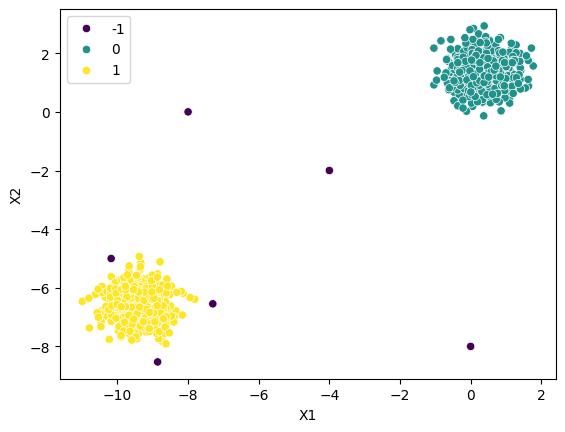

In [ ]:
dbscan = DBSCAN()
display_categories(dbscan, two_blobs_with_outliers)

Para hacer que sólo queden los outliers más alejados, se hace el siguiente procedimiento,

In [ ]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001, 1, 100):

  dbscan = DBSCAN(eps = eps)
  dbscan.fit(two_blobs_with_outliers)

  # Número total de outliers encontrados
  number_of_outliers.append(int(np.sum(dbscan.labels_ == -1)))

  # Porcentaje de outliers clasificados
  outlier_percent.append(round(float(100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)), 2))

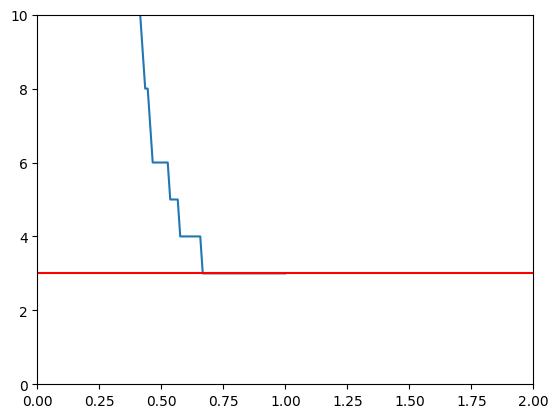

In [ ]:
sns.lineplot(x = np.linspace(0.001, 1, 100), y = number_of_outliers)
plt.xlim(0, 2)
plt.ylim(0, 10)
plt.hlines(y=3, xmin = 0, xmax = 2, color = "red")
plt.show()

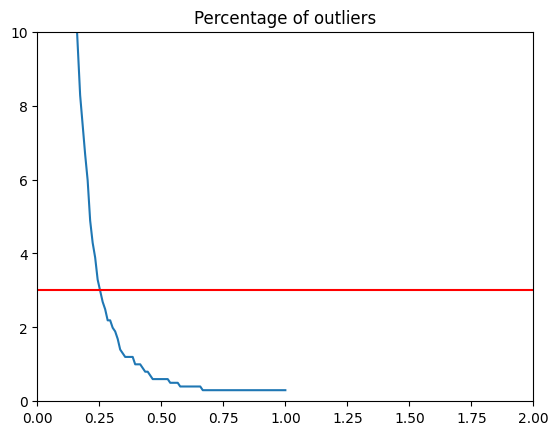

In [ ]:
sns.lineplot(x = np.linspace(0.001, 1, 100), y = outlier_percent)
plt.xlim(0, 2)
plt.ylim(0, 10)
plt.hlines(y=3, xmin = 0, xmax = 2, color = "red")
plt.title("Percentage of outliers")
plt.show()

Ahora con num_dims y la intersección entre el número de outliers y la línea, se definen los hiperpárametros.

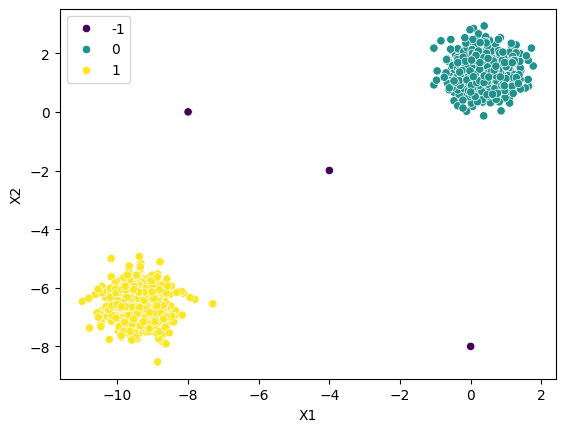

In [ ]:
num_dims = two_blobs_with_outliers.shape[1]
dbscan = DBSCAN(eps = 0.75, min_samples= num_dims + 2)
display_categories(dbscan, two_blobs_with_outliers)

Ahora se clasifican dos clústers de media luna con valores para epsilon y el número mínimo de puntos.

In [ ]:
cluster_moons = pd.read_csv('/content/drive/MyDrive/Machine Learning/Bases de Datos/cluster_moons.csv')

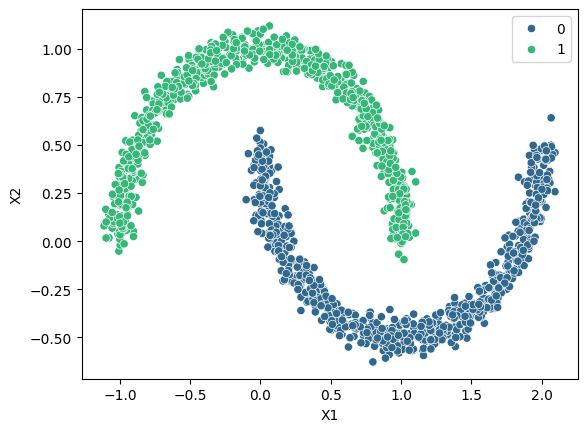

In [ ]:
dbscan = DBSCAN(eps=0.25, min_samples=6)
display_categories(dbscan, cluster_moons)

**Nota:** Los datos fueron extraídos del curso *Python for Machine Learning and Data Science Masterclass* de José Portilla en Udemy.

## Referencias

*   Jacinto, V. R. (2024). Machine learning: Fundamentos, algoritmos y aplicaciones para los negocios, industria y finanzas. Ediciones Díaz de Santos.
*   James, G., Witten, D., Hastie, T., & Tibshirani, R. (2021). An Introduction to Statistical Learning: with Applications in R. https://link.springer.com/content/pdf/10.1007/978-1-0716-1418-1.pdf
